In [1]:
import numpy as np
import matplotlib.pyplot as plt
import allantools

In [14]:
# Loading data file
# Column 1: B_x
# Column 2: B_y
# Column 3: B_z
# Column 4: |B|
# Column 5: time
# Column 6: Δt between measurements
magX = np.loadtxt('mag_data.txt', usecols=0)
magY = np.loadtxt('mag_data.txt', usecols=1)
magZ = np.loadtxt('mag_data.txt', usecols=2)
magn = np.loadtxt('mag_data.txt', usecols=3)
time = np.loadtxt('mag_data.txt', usecols=4)
tau_0 = np.mean(np.loadtxt('mag_data.txt', usecols=5))

# Compute overlapping Allan variance for B_x, B_y, B_z, and |B|
(tauX, adevX, adev_errorX, nX) = allantools.oadev(magX, rate=1/tau_0, taus='all')
(tauY, adevY, adev_errorY, nY) = allantools.oadev(magY, rate=1/tau_0, taus='all')
(tauZ, adevZ, adev_errorZ, nZ) = allantools.oadev(magZ, rate=1/tau_0, taus='all')
(tau, adev, adev_error, n) = allantools.oadev(magn, rate=1/tau_0, taus='all')

# B_x

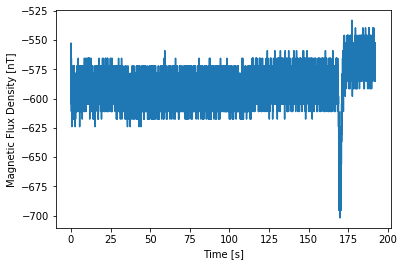

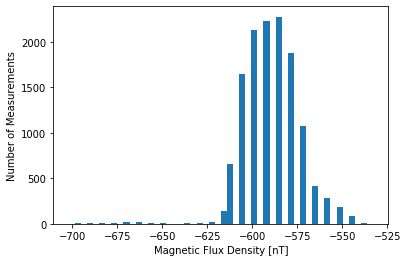

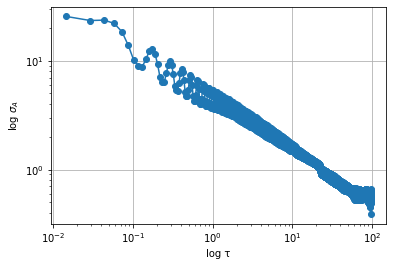

In [22]:
# B_x vs time
plt.figure(1)
plt.plot(time, magX)
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# histogram
plt.figure(2)
plt.hist(magX, 50)
plt.xlabel('Magnetic Flux Density [nT]')
plt.ylabel('Number of Measurements')
plt.show()

# log-log plot of Allan deviation vs averaging time
plt.figure(3)
plt.loglog(tauX, np.sqrt(adevX), '-o')
plt.grid()
plt.xlabel('log τ')
plt.ylabel(r'log $ \sigma_A $')
plt.show()

# B_y

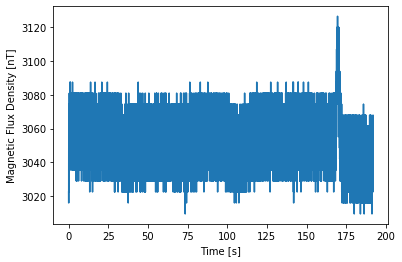

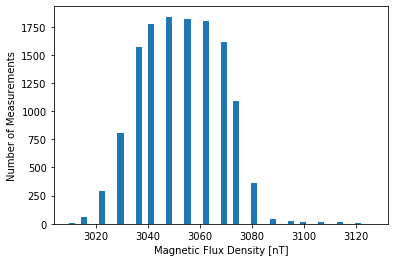

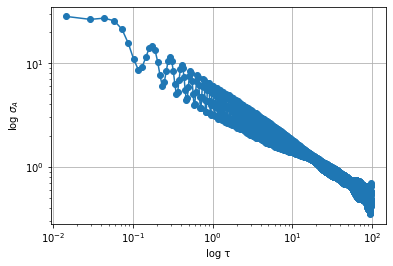

In [21]:
# B_y vs time
plt.figure(4)
plt.plot(time, magY)
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# histogram
plt.figure(5)
plt.hist(magY, 50)
plt.xlabel('Magnetic Flux Density [nT]')
plt.ylabel('Number of Measurements')
plt.show()

# log-log plot of Allan deviation vs averaging time
plt.figure(6)
plt.loglog(tauY, np.sqrt(adevY), '-o')
plt.grid()
plt.xlabel('log τ')
plt.ylabel(r'log $ \sigma_A $')
plt.show()

# B_z

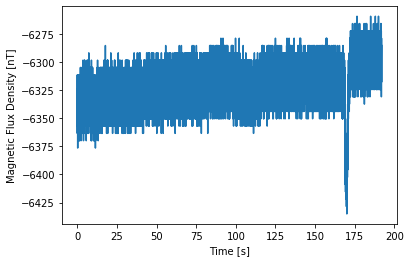

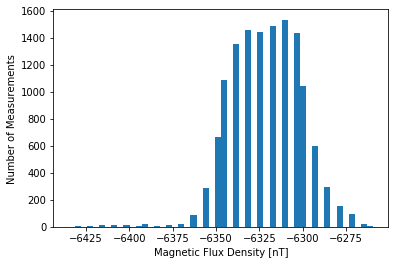

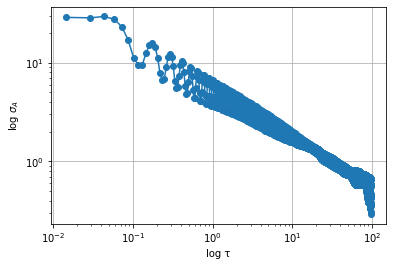

In [20]:
# B_z vs time
plt.figure(7)
plt.plot(time, magZ)
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# histogram
plt.figure(8)
plt.hist(magZ, 50)
plt.xlabel('Magnetic Flux Density [nT]')
plt.ylabel('Number of Measurements')
plt.show()

# log-log plot of Allan deviation vs averaging time
plt.figure(9)
plt.loglog(tauZ, np.sqrt(adevZ), '-o')
plt.grid()
plt.xlabel('log τ')
plt.ylabel(r'log $ \sigma_A $')
plt.show()

# |B|

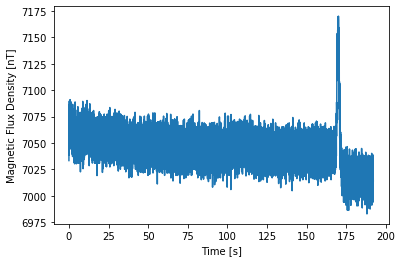

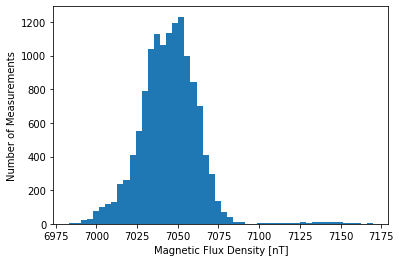

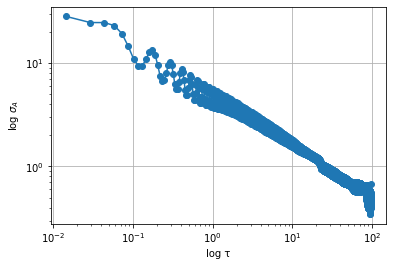

In [19]:
# |B| vs time
plt.figure(10)
plt.plot(time, magn)
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# histogram
plt.figure(11)
plt.hist(magn, 50)
plt.xlabel('Magnetic Flux Density [nT]')
plt.ylabel('Number of Measurements')
plt.show()

# log-log plot of Allan deviation vs averaging time
plt.figure(12)
plt.loglog(tau, np.sqrt(adev), '-o')
plt.grid()
plt.xlabel('log τ')
plt.ylabel(r'log $ \sigma_A $')
plt.show()